In [1]:
require(ggplot2)
require(reshape2)
require(lme4)
require(car)

Loading required package: ggplot2
Loading required package: reshape2
Loading required package: lme4
Loading required package: Matrix
Loading required package: car
Loading required package: carData
Error: package or namespace load failed for ‘car’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/Users/sarahgw/miniconda3/lib/R/library/curl/libs/curl.so':
  dlopen(/Users/sarahgw/miniconda3/lib/R/library/curl/libs/curl.so, 6): Library not loaded: @rpath/libcurl.4.dylib
  Referenced from: /Users/sarahgw/miniconda3/lib/R/library/curl/libs/curl.so
  Reason: Incompatible library version: curl.so requires version 10.0.0 or later, but libcurl.4.dylib provides version 9.0.0


Read in data, create treatment, remove dead or missing samples and vhigh low treatment

In [2]:
d=read.csv("~/Documents/DE/DE_DATA.csv")
d$Treatment=paste0(d$Density, d$Diversity)
d=d[!d$POST_DEAD_ALIVE=="DEAD",]
d=d[!d$POST_DEAD_ALIVE=="MISSING",]
d=d[!d$POST_DEAD_ALIVE=="PREDATION",]
d=d[!d$Treatment=="VHIGHLOW",]

In [3]:
head(d)

,Date_pre,Date_post,Site,Density,Diversity,Color,Number,Species,Length_pre,Width_pre,⋯,Dry_Weight_plate,Dry_weight_final,Dry_weight_shell,RFTM_date,PCR_score,RFTM_score,peacrabs,Notes_post,LiveMM,Treatment
1,5/30/17,NA,NW,HIGH,HIGH,B,1,CV,14.8,16.65,⋯,NA,NA,,9/25-10/2,0,0,0,,3,HIGHHIGH
2,5/30/17,NA,NW,HIGH,HIGH,B,2,CV,21.2,17.8,⋯,1.2813,1.74377,15.3875,,NA,NA,0,,3,HIGHHIGH
5,5/28/17,NA,NW,HIGH,HIGH,B,5,GD,115.9,43.8,⋯,NA,NA,,9/25-10/2,NA,0,0,pearl,3,HIGHHIGH
6,5/28/17,NA,NW,HIGH,HIGH,B,6,GD,99.4,39.4,⋯,1.2987,2.35152,32.43745,,NA,NA,0,,3,HIGHHIGH
8,5/28/17,NA,NW,HIGH,HIGH,B,8,GD,115.2,48.6,⋯,NA,NA,,9/25-10/2,NA,0,0,,3,HIGHHIGH
10,5/28/17,NA,NW,HIGH,HIGH,B,10,GD,110.3,41.1,⋯,1.2904,2.49389,35.5111,,NA,NA,0,,3,HIGHHIGH


Calculate total density for each bag and percent cv

In [4]:
numbers=table(d$Species, d$Color, d$Treatment, d$Site)
numbers=as.data.frame.table(numbers, response=Species)
colnames(numbers)=c("Species", "Color", "Treatment", "Site", "Number")
numbers=dcast(numbers, Treatment+Site+Color~Species)
numbers$TotalDensity=numbers$CV+numbers$GD+numbers$MM
numbers$PerCV=(numbers$CV/numbers$TotalDensity)*100
dc=merge(d, numbers, by=c("Treatment", "Site", "Color"))

Using Number as value column: use value.var to override.


calculate change in measurements

In [5]:
dc[c(10:13, 16:19, 21:25)]=apply(dc[c(10:13, 16:19, 21:25)], 2, as.character)
dc[c(10:13, 16:19, 21:25)]=apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric)
dc$Height_change=dc$Height_post-dc$Height_pre
dc$Weight_change=dc$Weight_post-dc$Weight_pre
dc$Length_change=dc$Length_post-dc$Length_pre
dc$Width_change=dc$Width_post-dc$Width_pre
dc$Dry_weight=dc$Dry_weight_final-dc$Dry_Weight_plate

Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”

Separate by species

In [9]:
cv=dc[dc$Species=="CV",]
gd=dc[dc$Species=="GD",]
mm=dc[dc$Species=="MM",]

In [7]:
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

# Wet Weight
## Change in wet weight by treatment

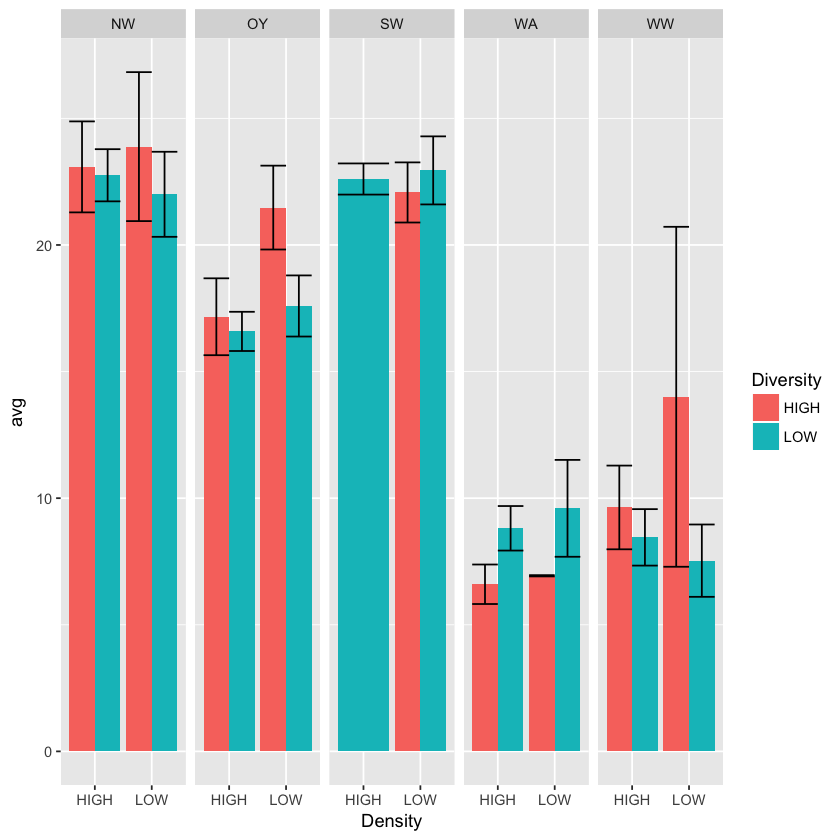

In [8]:
Weightchange=aggregate(Weight_change~Density+Diversity+Site, data=cv, FUN=multi)
Weightchange$avg=Weightchange$Weight_change[,1]
Weightchange$sd=Weightchange$Weight_change[,2]
Weightchange=Weightchange[-4]
ggplot(Weightchange, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [9]:
Weightchangeb=aggregate(Weight_change~Color+Density+Diversity+Site, data=cv[!cv$Site=="WA",], FUN=mean)
wc_results= lm(Weight_change ~ Density*Diversity*Site, data=Weightchangeb)
anova(wc_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,31.483624,31.483624,1.84319938,1.821867e-01
Diversity,1,11.946839,11.946839,0.69942412,4.079457e-01
Site,3,1690.944548,563.648183,32.99861445,6.646180e-11
Density:Diversity,1,14.759365,14.759365,0.86408263,3.581748e-01
Density:Site,3,14.564208,4.854736,0.28421907,8.364842e-01
Diversity:Site,3,48.270555,16.090185,0.94199507,4.294253e-01
Density:Diversity:Site,2,2.504113,1.252056,0.07330127,9.294453e-01
Residuals,40,683.238605,17.080965,NA,NA


## Just look at post wet weight by treatment

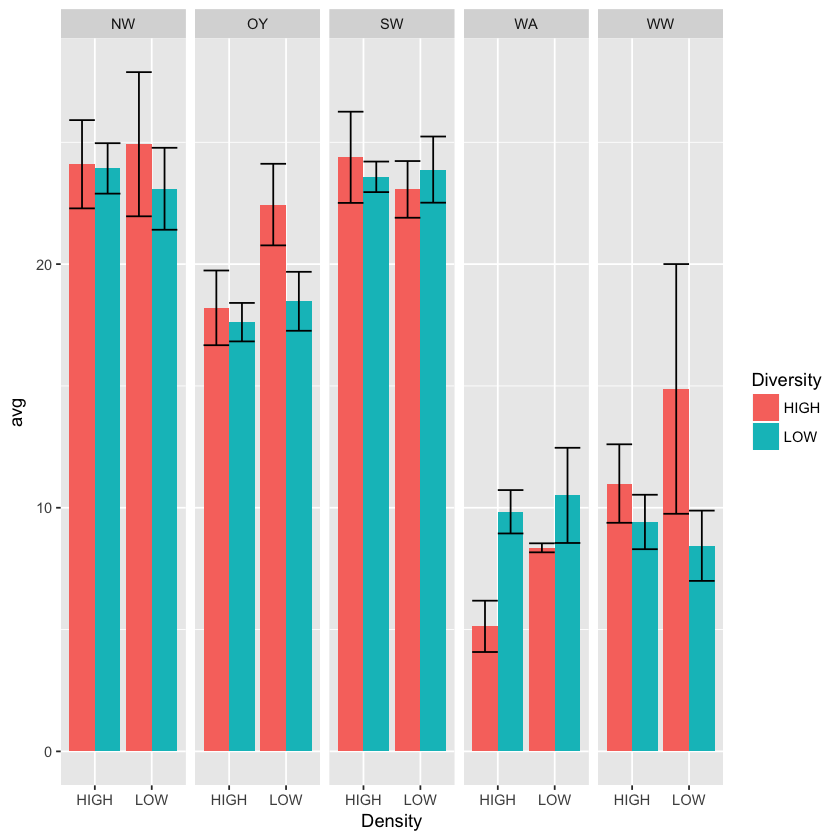

In [12]:
Weightpost=aggregate(Weight_post~Density+Diversity+Site, data=cv, FUN=multi)
Weightpost$avg=Weightpost$Weight_post[,1]
Weightpost$sd=Weightpost$Weight_post[,2]
Weightpost=Weightpost[-4]
ggplot(Weightpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

# Just look at oysters taken for RFTM and PCR

In [10]:
cvRFTM=cv[cv$Genetics_Weight=="G"&!is.na(cv$RFTM_score),]
cvRFTM$RFTM_prev=ifelse(cvRFTM$RFTM_score>0, 1, 0)

In [11]:
cvPCR=cv[cv$Genetics_Weight=="G"&!is.na(cv$PCR_score),]
cvPCR$PCR_prev=ifelse(cvPCR$PCR_score>0, 1, 0)

prevalencep=with(cvPCR, tapply(PCR_prev, list(Density, Diversity, Site, Color),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalencep=na.omit(as.data.frame.table(prevalencep, response=PCR_prev))
colnames(prevalencep)=c("Density", "Diversity","Site","Color", "PCR_prev")

How many do we want to take for sequencing?

, ,  = 0

     
       0  1
  0   51 27
  0.5  4 10
  1    0 32
  2    0 19
  3    1 14
  4    0  5
  5    0  1

, ,  = 1

     
       0  1
  0    2  1
  0.5  0  0
  1    0  2
  2    0  3
  3    0  1
  4    0  0
  5    0  0


In [39]:
table(cvPCR$Site, cvPCR$RFTM_score, cvPCR$PCR_score, cvPCR$Treatment)

, ,  = 0,  = HIGHHIGH

    
      0 0.5  1  2  3  4  5
  NW  7   0  0  0  0  0  0
  OY  3   0  0  0  0  0  0
  SW  2   0  0  0  0  0  0
  WA  0   0  0  0  0  0  0
  WW  0   0  0  0  0  0  0

, ,  = 1,  = HIGHHIGH

    
      0 0.5  1  2  3  4  5
  NW  2   0  2  0  0  0  0
  OY  3   1  3  1  1  0  0
  SW  1   1  2  3  0  0  0
  WA  0   0  0  0  0  0  0
  WW  0   0  0  0  0  0  0

, ,  = 0,  = HIGHLOW

    
      0 0.5  1  2  3  4  5
  NW  7   0  0  0  0  0  0
  OY  2   1  0  0  0  0  0
  SW 11   0  0  0  0  0  0
  WA  0   0  0  0  0  0  0
  WW  0   0  0  0  0  0  0

, ,  = 1,  = HIGHLOW

    
      0 0.5  1  2  3  4  5
  NW  5   1  8  4  2  1  0
  OY  2   1  5  1  1  0  1
  SW  6   2  5  2  4  0  0
  WA  0   0  0  0  0  0  0
  WW  0   0  0  0  0  0  0

, ,  = 0,  = LOWHIGH

    
      0 0.5  1  2  3  4  5
  NW  0   0  0  0  0  0  0
  OY  3   0  0  0  0  0  0
  SW  3   0  0  0  0  0  0
  WA  0   0  0  0  0  0  0
  WW  0   0  0  0  0  0  0

, ,  = 1,  = LOWHIGH

    
      0 0.5  1  2  3 

In [29]:
table( cvPCR$RFTM_score, cvPCR$PCR_score, cvPCR$peacrabs)

, ,  = 0

     
       0  1
  0   51 27
  0.5  4 10
  1    0 32
  2    0 19
  3    1 14
  4    0  5
  5    0  1

, ,  = 1

     
       0  1
  0    2  1
  0.5  0  0
  1    0  2
  2    0  3
  3    0  1
  4    0  0
  5    0  0


In [32]:
table(cv$Site, cv$peacrabs)

    
       0   1
  NW 118   5
  OY  96   6
  SW 121   4
  WA  33   9
  WW  70  14

In [33]:
3+2+5+12+11+11+8+4+10+6+4+5+4+1+1
87+36

[1] 87

[1] 123

In [36]:
2*(9+14)+126

[1] 172

If you did only NW, OY, SW
13 from each site that were negative for perk (both pcr and rftm) =39
All of the PCR pos, RFTM pos = 87
Total 126. 
8 of those have peacrabs. 

But there are 
9 peacrabs at WA, 14 peacrabs at WW. 
so if you added htis on and did 2 runs...
Would end up with 172. That gives us 80 more spots. 
I would like to fill them with the oysters from the salinity experiment...no one has looked at this, we have both young and old oysters, could be really interesting given the low salinity of climate change going forward. 


In [37]:
700+300+460+1700

[1] 3160

In [38]:
700+300+920+3400

[1] 5320

## Do infected oysters gain less weight?

## RFTM:

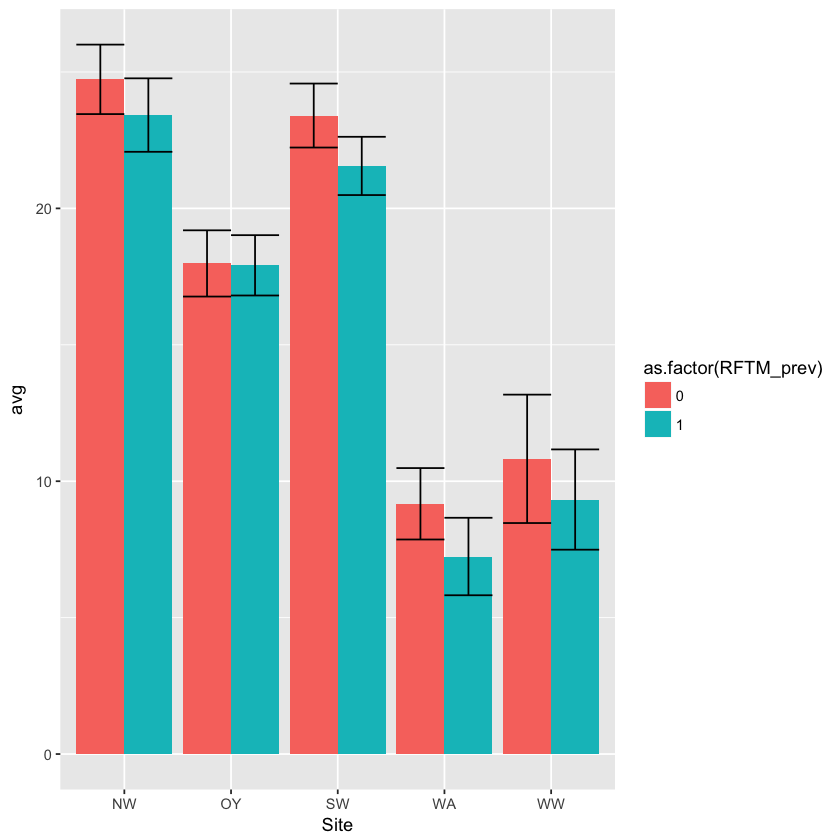

In [13]:
WeightchangeR=aggregate(Weight_change~RFTM_prev+Site, data=cvRFTM, FUN=multi)
WeightchangeR$avg=WeightchangeR$Weight_change[,1]
WeightchangeR$sd=WeightchangeR$Weight_change[,2]
WeightchangeR=WeightchangeR[-3]
ggplot(WeightchangeR, aes(x = Site, y = avg, fill=as.factor(RFTM_prev))) + geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

### Yes, but not at OY. why?

## PCR:

In [8]:
WeightchangeP=aggregate(Weight_change~PCR_prev+Site, data=cvPCR, FUN=multi)
WeightchangeP$avg=WeightchangeP$Weight_change[,1]
WeightchangeP$sd=WeightchangeP$Weight_change[,2]
WeightchangeP=WeightchangeP[-3]
ggplot(WeightchangeP, aes(x = Site, y = avg, fill=as.factor(PCR_prev)))+geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

ERROR: Error in eval(m$data, parent.frame()): object 'cvPCR' not found


### More pronounced different in NW and SW, but still not OY.

In [15]:
Weightchangep_results= lm(Weight_change~PCR_prev*Site, data=cvPCR)
anova(Weightchangep_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PCR_prev,1,209.4088,209.40878,4.618634,3.312049e-02
Site,2,1153.8438,576.92189,12.724351,7.403794e-06
PCR_prev:Site,2,127.3332,63.66660,1.404204,2.485534e-01
Residuals,161,7299.7379,45.33999,NA,NA


Interaction isn't significant, but prevalence is. 

## Does prevalence change with treatment?


## RFTM:

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

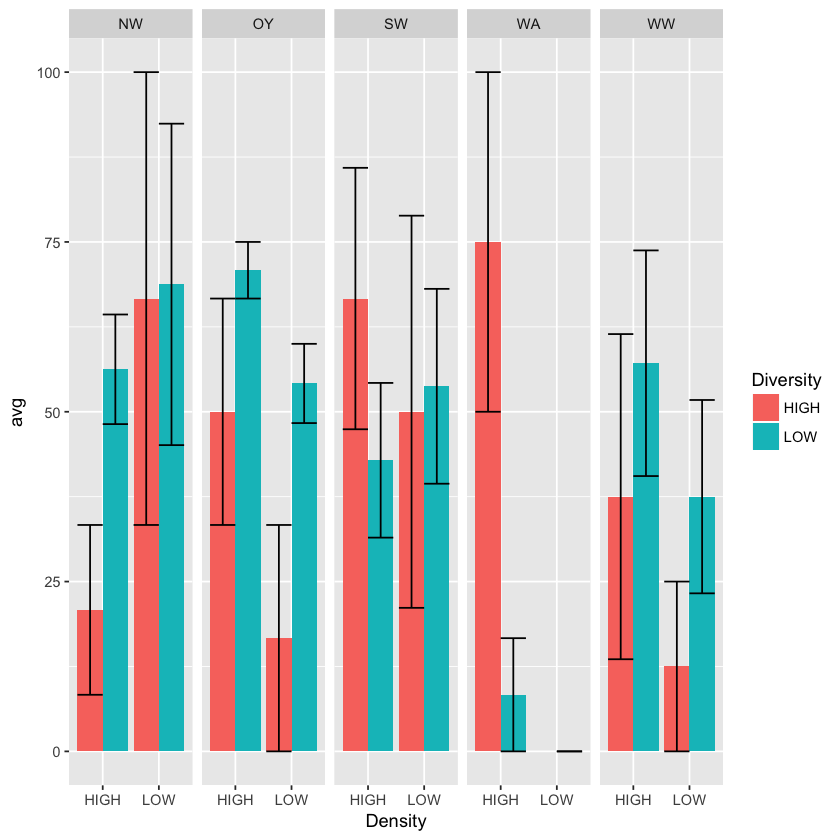

In [16]:
prevalence=with(cvRFTM, tapply(RFTM_prev, list(Density, Diversity, Site, Color),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalence=na.omit(as.data.frame.table(prevalence, response=RFTM_prev))
colnames(prevalence)=c("Density", "Diversity","Site","Color", "RFTM_prev")
prevCV=aggregate(RFTM_prev~Density+Diversity+Site, data=prevalence, FUN=multi)
prevCV$avg=prevCV$RFTM_prev[,1]
prevCV$sd=prevCV$RFTM_prev[,2]
prevCV=prevCV[-4]
ggplot(prevCV, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

Anova, exclude WA and WW:

In [17]:
prev_results= lm(RFTM_prev ~ Density*Diversity*Site, data=cvRFTM[!cvRFTM$Site=="WA"|cvRFTM$Site=="WW",])
anova(prev_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,0.019053702,0.019053702,0.07802201,0.78027764
Diversity,1,0.725533058,0.725533058,2.97094739,0.08627987
Site,3,0.630754998,0.210251666,0.86094856,0.46225130
Density:Diversity,1,0.004361547,0.004361547,0.01785987,0.89381770
Density:Site,3,1.855969348,0.618656449,2.53330396,0.05806074
Diversity:Site,3,1.164076775,0.388025592,1.58890571,0.19319274
Density:Diversity:Site,3,0.759058406,0.253019469,1.03607620,0.37759717
Residuals,205,50.062911624,0.244209325,NA,NA


## PCR:

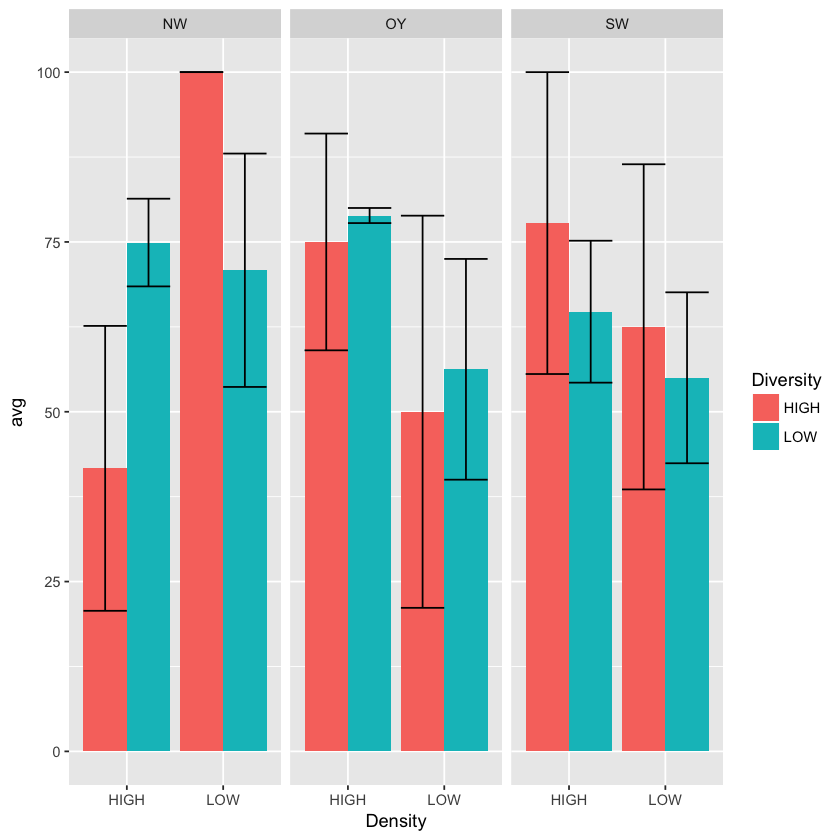

In [18]:
prevpCV=aggregate(PCR_prev~Density+Diversity+Site, data=prevalencep, FUN=multi)
prevpCV$avg=prevpCV$PCR_prev[,1]
prevpCV$sd=prevpCV$PCR_prev[,2]
prevpCV=prevpCV[-4]
ggplot(prevpCV, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

prevp_results= lm(PCR_prev ~ Density*Diversity*Site, data=cvPCR)
anova(prevp_results)

## Using  site as replicate
## RFTM:

In [19]:
prevalenceS=with(cvRFTM, tapply(RFTM_prev, list(Density, Diversity, Site),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalenceS=na.omit(as.data.frame.table(prevalenceS, response=RFTM_prev))
colnames(prevalenceS)=c("Density", "Diversity","Site","RFTM_prev")
prevS_results= lm(RFTM_prev ~ Density*Diversity, data=prevalenceS[!prevalenceS$Site=="WA",])
anova(prevS_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,1.909246e-02,0.01909246,4.637641e-05,0.9946783
Diversity,1,7.231058e+02,723.10579173,1.756455e+00,0.2097472
Density:Diversity,1,8.023703e-01,0.80237029,1.948992e-03,0.9655130
Residuals,12,4.940218e+03,411.68482824,NA,NA


## PCR:

In [75]:
prevalencepS=with(cvPCR, tapply(PCR_prev, list(Density, Diversity, Site),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalencepS=na.omit(as.data.frame.table(prevalencepS, response=PCR_prev))
colnames(prevalencepS)=c("Density", "Diversity","Site","PCR_prev")
prevpS_results= lm(PCR_prev ~ Density*Diversity, data=prevalencepS)
anova(prevpS_results)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Density,1,1.157934e+01,11.57934312,3.273635e-02,0.8609208
Diversity,1,3.128141e-02,0.03128141,8.843671e-05,0.9927270
Density:Diversity,1,2.852359e+02,285.23593022,8.064000e-01,0.3954084
Residuals,8,2.829721e+03,353.71517921,NA,NA


In [87]:
prevS1=glm(PCR_prev~Density*Diversity, data=cvPCR, family = binomial(link = "logit"))
Anova(prevS1, Type="3")

,LR Chisq,Df,Pr(>Chisq)
Density,0.8549746,1,0.3551489
Diversity,0.1505020,1,0.6980561
Density:Diversity,0.8521661,1,0.3559403


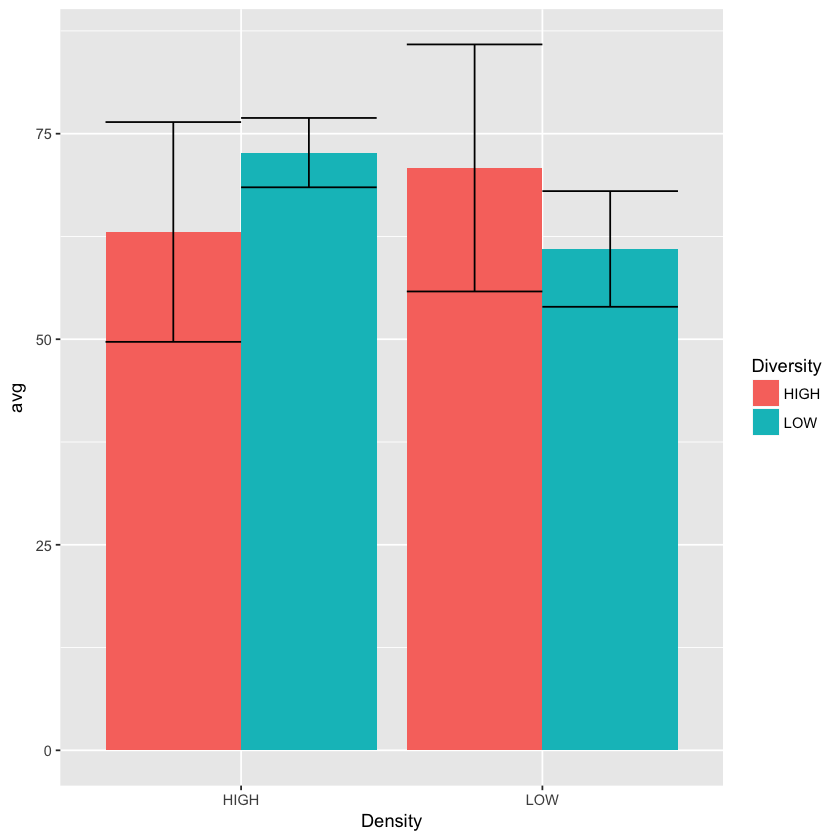

In [81]:
prevpSCV=aggregate(PCR_prev~Density+Diversity, data=prevalencepS, FUN=multi)
prevpSCV$avg=prevpSCV$PCR_prev[,1]
prevpSCV$sd=prevpSCV$PCR_prev[,2]
prevpSCV=prevpSCV[-3]
ggplot(prevpSCV, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

# Could we make the argument that this graph shows that if we increased the density, we could get lower prevalence in the high diversity oysters? 
Its obviously not significant, and I think that the difference in standard error is due to the number of oysters in high and low diversity treatments...

# Convert treatments into continuous variables, run logistic regression
## RFTM:

In [82]:
cvRFTM$TotalDensity_s=scale(cvRFTM$TotalDensity)
cvRFTM$PerCV_s=scale(cvRFTM$PerCV)
cvRFTM$TotalDensity_s=scale(cvRFTM$TotalDensity)
cvRFTM$PerCV_s=scale(cvRFTM$PerCV)
prev1=glmer(RFTM_prev~TotalDensity_s*PerCV_s+(1|Site/Color/Number), data=cvRFTM, family = binomial(link = "logit"))
Anova(prev1, Type="3")

,Chisq,Df,Pr(>Chisq)
TotalDensity_s,0.48859835,1,0.4845532
PerCV_s,0.79671133,1,0.3720785
TotalDensity_s:PerCV_s,0.09446344,1,0.7585777


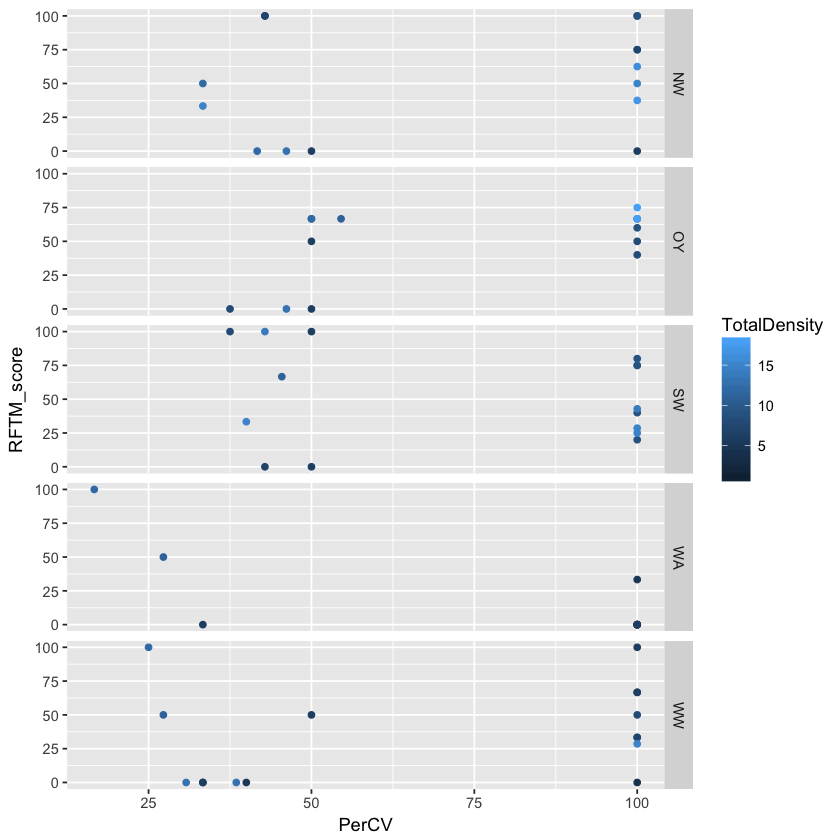

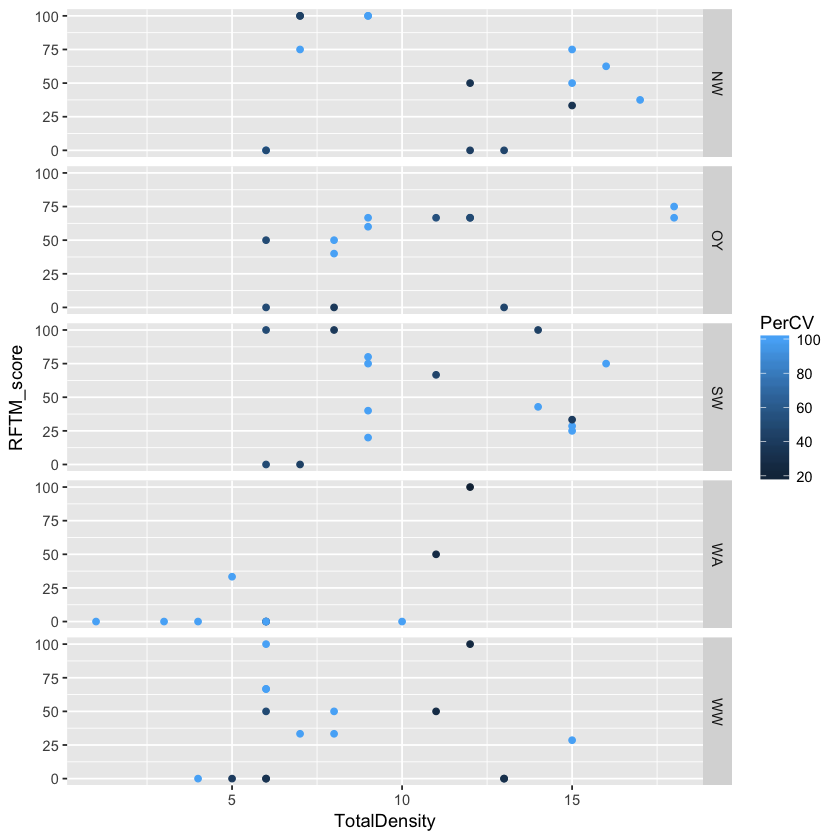

In [83]:
prevalence=with(cvRFTM, tapply(RFTM_score, list(Treatment, TotalDensity, PerCV, Site, Color),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalence=na.omit(as.data.frame.table(prevalence, response=RFTM_score))
colnames(prevalence)=c("Treatment", "TotalDensity", "PerCV", "Site", "Color", "RFTM_score")
prevalence[c(2,3,6)]=apply(prevalence[c(2,3,6)], 2, as.character)                          
prevalence[c(2,3,6)]=apply(prevalence[c(2,3,6)], 2, as.numeric) 
ggplot(prevalence, aes(x=PerCV, y=RFTM_score)) + facet_grid(Site~.)+geom_point(aes(color=TotalDensity))
ggplot(prevalence, aes(x=TotalDensity, y=RFTM_score)) + facet_grid(Site~.)+ geom_point(aes(color=PerCV))

## PCR:

In [84]:
cvPCR$TotalDensity_s=scale(cvPCR$TotalDensity)
cvPCR$PerCV_s=scale(cvPCR$PerCV)
cvPCR$TotalDensity_s=scale(cvPCR$TotalDensity)
cvPCR$PerCV_s=scale(cvPCR$PerCV)
prevp=glmer(PCR_prev~TotalDensity_s*PerCV_s+(1|Site/Color), data=cvPCR, family = binomial(link = "logit"))
Anova(prevp, Type="3")

,Chisq,Df,Pr(>Chisq)
TotalDensity_s,0.8365531,1,0.3603845
PerCV_s,0.0836727,1,0.7723806
TotalDensity_s:PerCV_s,2.4276596,1,0.1192108


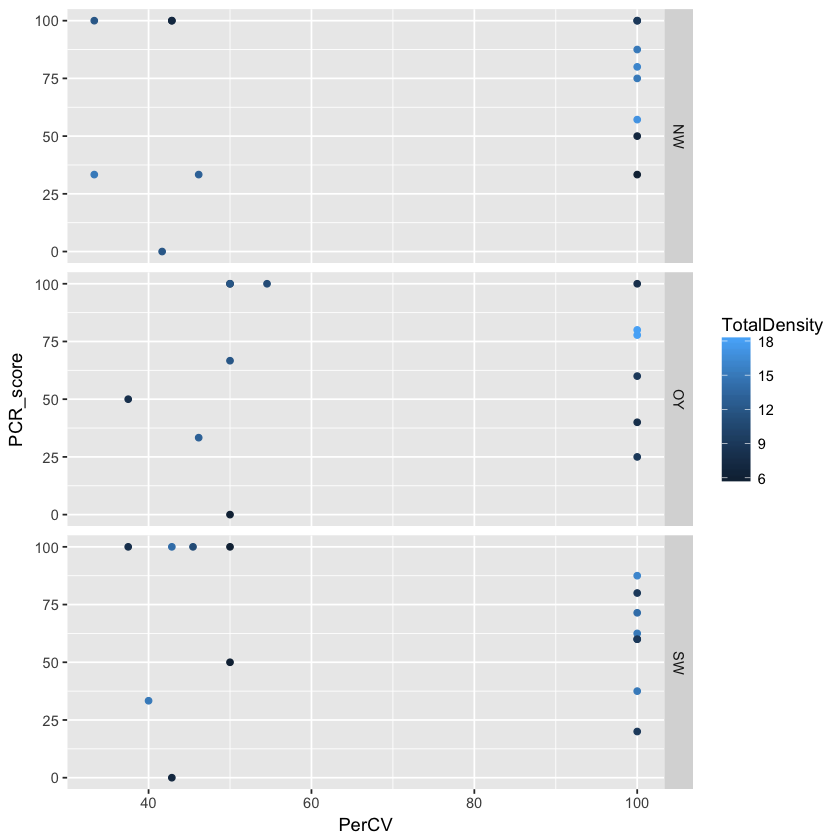

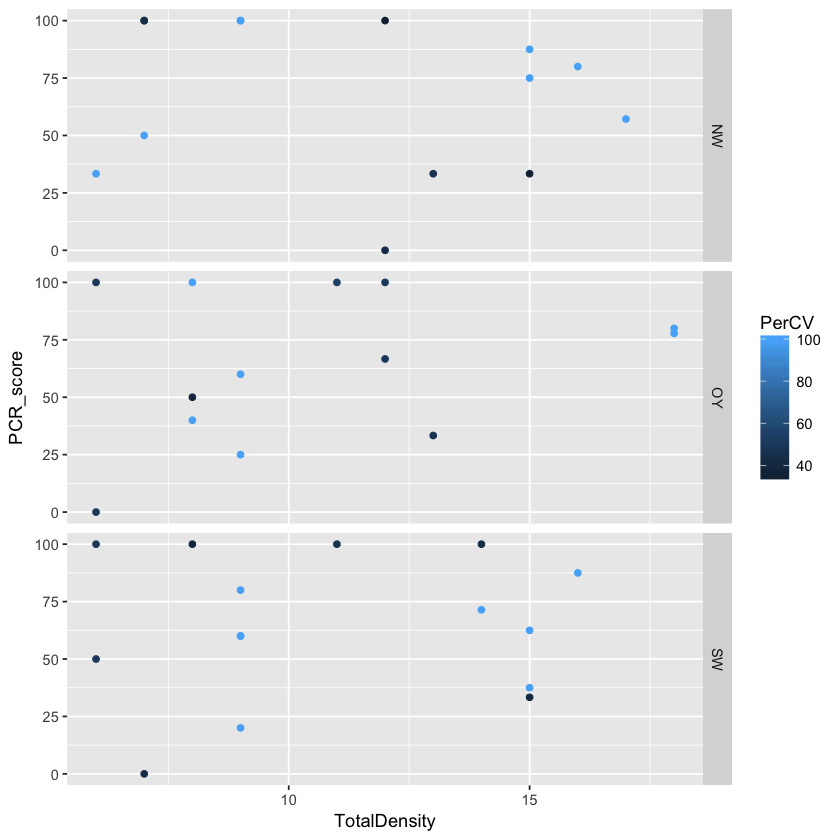

In [85]:
prevalencep=with(cvPCR, tapply(PCR_score, list(Treatment, TotalDensity, PerCV, Site, Color),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))
prevalencep=na.omit(as.data.frame.table(prevalencep, response=PCR_score))
colnames(prevalencep)=c("Treatment", "TotalDensity", "PerCV", "Site", "Color", "PCR_score")
prevalencep[c(2,3,6)]=apply(prevalencep[c(2,3,6)], 2, as.character)                          
prevalencep[c(2,3,6)]=apply(prevalencep[c(2,3,6)], 2, as.numeric) 
ggplot(prevalencep, aes(x=PerCV, y=PCR_score)) + facet_grid(Site~.)+geom_point(aes(color=TotalDensity))
ggplot(prevalencep, aes(x=TotalDensity, y=PCR_score)) + facet_grid(Site~.)+ geom_point(aes(color=PerCV))